# <div style="text-align: center"> <font size=+5> <ins>FIGURES for PAPER</ins> </font> </div>
___


# Import packages, settings and load variables

In [21]:
#imports
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch, Path

from scipy.stats import chi2_contingency

In [5]:
#settings
plt.rcParams.update({'figure.figsize': [6.0, 4.0],
                     'figure.dpi' : 300,
                     'font.size': 12.0, 
                     'mathtext.fontset' : 'stix', 
                     'font.family' : 'STIXGeneral'
                    })

pd.set_option('display.max_columns', 500)

In [47]:
#load variables

#dataset with unclustered questions (answers converted to numerical ranges, no indicators)
questions_dataset = pd.read_pickle("../Saved_variables/data_issp_questions_numerical.pickle").droplevel(axis=1, level=0)

#full dataset with clustered questions, individual and country-wide indicators (individual indicators as categories)
full_dataset = pd.read_pickle("../Saved_variables/full_dataset.pickle")

#full dataset with categorical variables converted to numerical
conv_dict_respData = {
        "Sex" : {"Male" : -1, "Female" : 1},
        "Education level" : {"No degree" : 0, "Primary" : 1, "Secondary" : 2, "University" : 3},
        "Living area" : {"Rural area" : 0, "Small city" : 1, "Big city" : 2},
        "Political orientation" : {"Far Left" : -3, "Left" : -2, "Center Left" : -1, "Center" : 0, "None/Other" : 0, "Center Right" : 1, "Right" : 2, "Far Right" : 3},
        "Religious beliefs" : {"Atheist" : 0, "Christian" : 1, "Islamic" : 1, "Jewish" : 1, "Other" : 1}
    }

data_resp_numerical = full_dataset.loc[:, ("Respondent Data", slice(None))].apply(lambda col: col if col.name[1] not in conv_dict_respData else col.map(lambda x: np.nan if pd.isna(x) else conv_dict_respData[col.name[1]][x]).astype(float))
full_dataset_numerical = full_dataset.drop(columns=["Respondent Data"])
full_dataset_numerical = pd.concat([data_resp_numerical, full_dataset], axis=1)

#dataset with all downloaded indicators
macro_indicators_dict = {(ind[:-7]) : pd.read_pickle(f"../Processed_Data/indicators/{ind}") for ind in os.listdir("../Processed_Data/indicators") if ind[-7:] == ".pickle"}
macro_ind_df = pd.concat([pd.DataFrame.from_records([full_dataset.index.droplevel("Unique ID").unique().map(lambda idx: indicator.loc[idx[1], idx[0]]) for indicator in macro_indicators_dict.values()], index=macro_indicators_dict.keys(), columns=full_dataset.index.droplevel("Unique ID").unique()).T], keys=["Country-wide indicators"], names=["Variable Type", "Variable Name"], axis=1)

newcols = {
    "GHG_emissions"     : "Greenhouse gases emissions",
    "PM25_exposure"     : "PM25 exposure",
    "GDP_growth"        : "GDP growth",
    "gini_index"        : "Gini index",
    "GDP_pcap_ppp"      : "GDP per capita (Purchasing Power Parity)",
    "water_withdrawals" : "Water withdrawals",
    "pesticides_use"    : "Pesticides use",
    "GDP_pcap"          : "GDP per capita",
    "internet_usage"    : "Internet usage",
    "CO2_emissions_per_capita" : "CO2 emissions per capita",
    "infant_mortality"  : "Infant mortality"
          }

newcols = {("Country-wide indicators", key) : ("Country-wide indicators", value) for key, value in newcols.items()}
macro_ind_df.columns = macro_ind_df.columns.map(lambda x: newcols.get(x,x))
del(macro_indicators_dict, newcols)


#series with belonging cluster for each country
countries_clusters = pd.read_pickle("../Saved_variables/countries_cluster.pickle")

#predictive modeling results
recapTable_tensorflow = pd.read_pickle("../Saved_variables/predictive_indicators_merged_tensorflow.pickle")
recapTable_mixedLM = pd.read_pickle("../Saved_variables/predictive_indicators_mixedLM.pickle")
recapTable_trees = pd.read_pickle("../Saved_variables/predictive_indicators_trees.pickle")

/var/folders/mv/3xxn6x011nj1xbbrht5z6r1m0000gn/T/ipykernel_4138/3348763138.py:19: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  full_dataset_numerical = full_dataset.drop(columns=["Respondent Data"])


___
# Workflow (TODO)

___
# Correlations

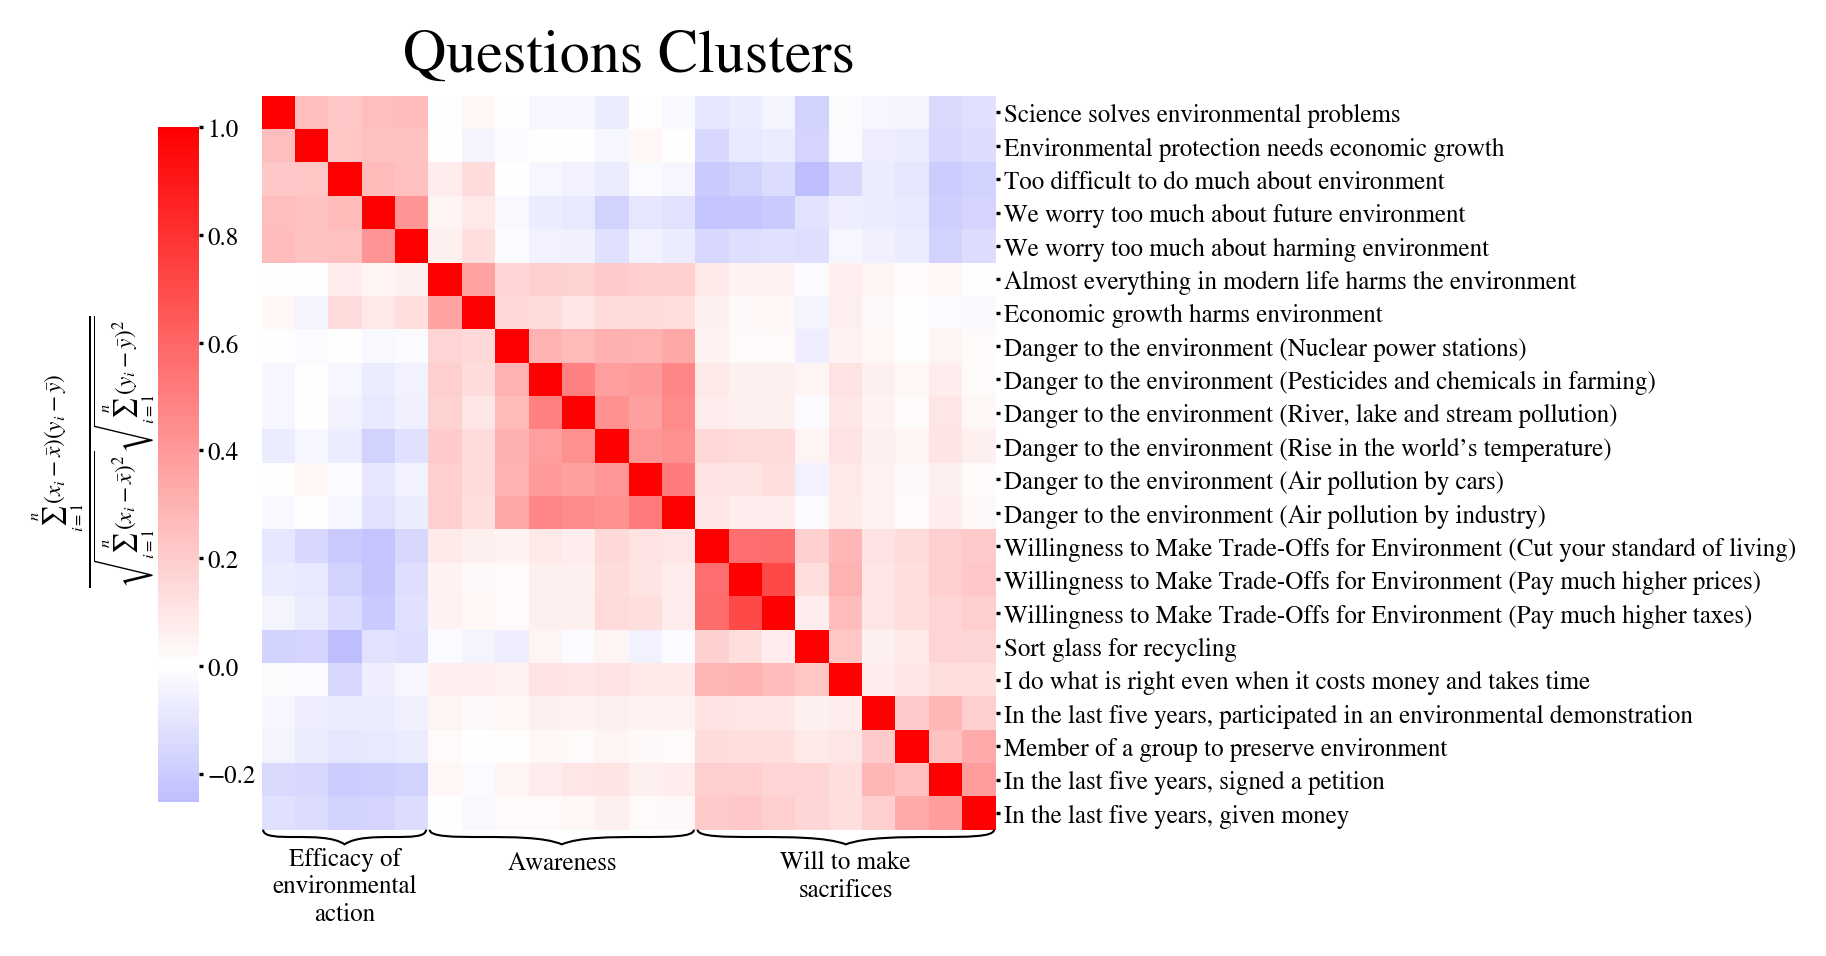

In [56]:
def CurlyBrace(x, y, width=1/8, height=1., curliness=1/np.e, pointing='left', **patch_kw):
    verts = np.array([
           [width,0],
           [0,0],
           [width, curliness],
           [0,.5],
           [width, 1-curliness],
           [0,1],
           [width,1]
           ])
    
    if pointing == 'left':
        pass
    elif pointing == 'right':
        verts[:,0] = width - verts[:,0]

    verts[:,1] *= height

    #horizontal rather than vertical
    verts = verts[:,::-1]
    
    verts[:,0] += x
    verts[:,1] += y

    
    
    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    path = Path(verts, codes)

    # convert `color` parameter to `edgecolor`, since that's the assumed intention
    patch_kw['edgecolor'] = patch_kw.pop('color', 'black')

    pp = PathPatch(path, facecolor='none', **patch_kw) 
    return pp


clm = sns.clustermap(questions_dataset.corr(), cmap="bwr", center=0, cbar_pos=(0.05, 0.65, 0.015, 0.25), method="ward", figsize=(9,9))
clm.ax_row_dendrogram.set_visible(False)
clm.ax_col_dendrogram.set_visible(False)
clm.tick_params(size=1, pad=1, labelsize=6)

#clm.ax_heatmap.set_title("Environmental concern dimensions", fontsize=20);
clm.ax_heatmap.set_xticks([])
clm.ax_heatmap.set_xlabel("")
clm.ax_heatmap.set_ylabel("")
clm.ax_cbar.text(x=-1.6, y=0.4, s=r"$\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}$", fontsize=8, rotation=90, va='center', ha='center')

brace = CurlyBrace(x=0.002, y=-0.02, width=.02, height=0.222, pointing='left', transform=clm.ax_heatmap.transAxes, color='black', linewidth=0.5)
clm.fig.patches.append(brace)
clm.ax_heatmap.text(x=2.5, y=23.7, s="Efficacy of\nenvironmental\naction", fontsize=6, rotation=0, va='center', ha='center')

brace = CurlyBrace(x=0.229, y=-0.02, width=.02, height=0.36, pointing='left', transform=clm.ax_heatmap.transAxes, color='black', linewidth=0.5)
clm.fig.patches.append(brace)
clm.ax_heatmap.text(x=9, y=23, s="Awareness", fontsize=6, rotation=0, va='center', ha='center')

brace = CurlyBrace(x=0.594, y=-0.02, width=.02, height=0.404, pointing='left', transform=clm.ax_heatmap.transAxes, color='black', linewidth=0.5)
clm.fig.patches.append(brace)
clm.ax_heatmap.text(x=17.5, y=23.4, s="Will to make\nsacrifices", fontsize=6, rotation=0, va='center', ha='center')

clm.ax_heatmap.set_title("Questions Clusters");

clm.savefig("../PaperFigures/questions_clusters.pdf", format="pdf")

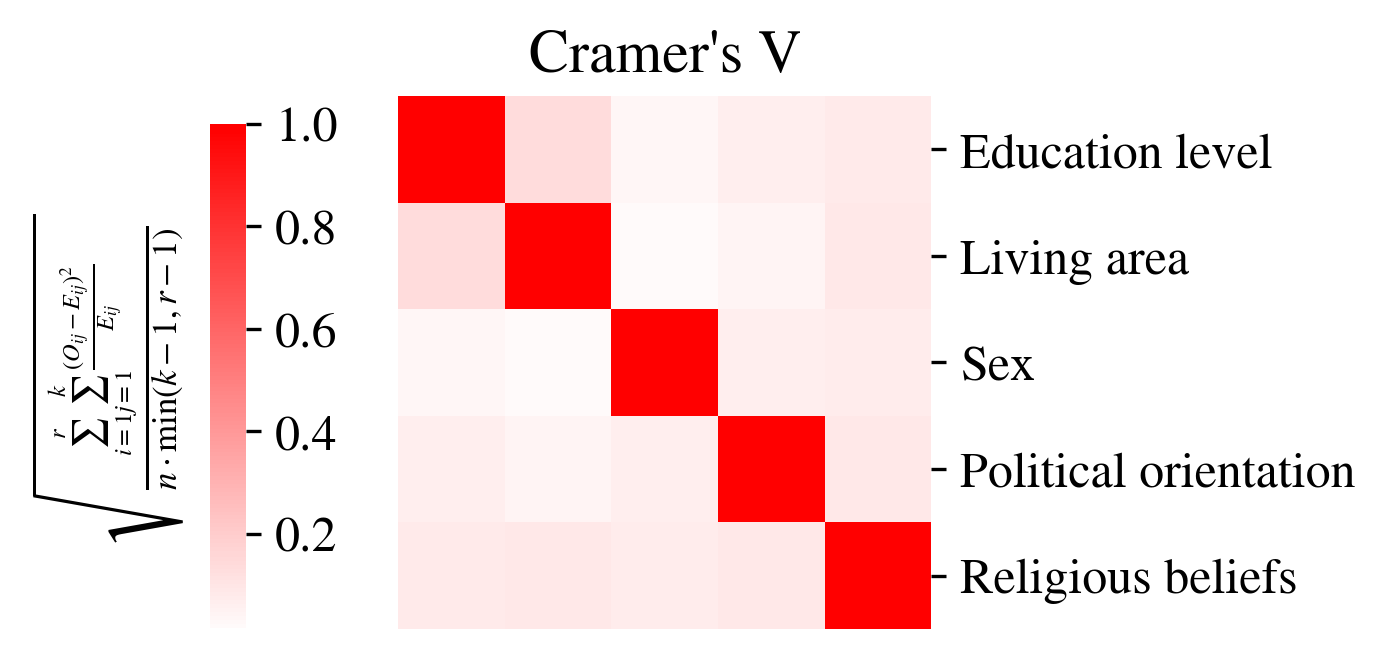

In [57]:
micro_ind_df = full_dataset.loc[:,"Respondent Data"].select_dtypes(include="category").dropna()
corr_matrix = pd.DataFrame(1, index=micro_ind_df.columns.values, columns=micro_ind_df.columns.values, dtype="float")

for i in corr_matrix.index:
    for j in corr_matrix.columns:
        if i != j:
            crosstab = pd.crosstab(micro_ind_df[i], micro_ind_df[j])
            chi2 = chi2_contingency(crosstab)[0]
            n = crosstab.sum().sum()
            phi2 = chi2/n
            r,k = crosstab.shape
            phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            corr_matrix.loc[i,j] = np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

clm = sns.clustermap(corr_matrix, center=0, cmap="bwr", cbar_pos=(0, 0.4, 0.03, 0.42), method="ward", figsize=(4,4))
clm.ax_row_dendrogram.set_visible(False)
clm.ax_col_dendrogram.set_visible(False)
#clm.tick_params(size=1, pad=1, labelsize=6)
#clm.ax_heatmap.set_yticklabels(clm.ax_heatmap.get_ymajorticklabels(), fontsize=10, rotation=0)
#clm.ax_cbar.set_yticklabels(clm.ax_cbar.get_ymajorticklabels(), fontsize=10)

#clm.ax_heatmap.set_title("Cramér's V for categorical micro indicators", fontsize=20);
clm.ax_heatmap.set_xticks([])
clm.ax_heatmap.set_xlabel("")
clm.ax_heatmap.set_ylabel("")

clm.ax_cbar.text(x=-5, y=0.5, s=r"$\sqrt{\frac{\sum_{i=1}^r \sum_{j=1}^k \frac{(O_{ij} - E_{ij})^2}{E_{ij}}}{n \cdot \min(k-1, r-1)}}$", rotation=90, va="center")

clm.ax_heatmap.set_title("Cramer's V");

clm.savefig("../PaperFigures/categorical_cramerV.pdf", format="pdf")

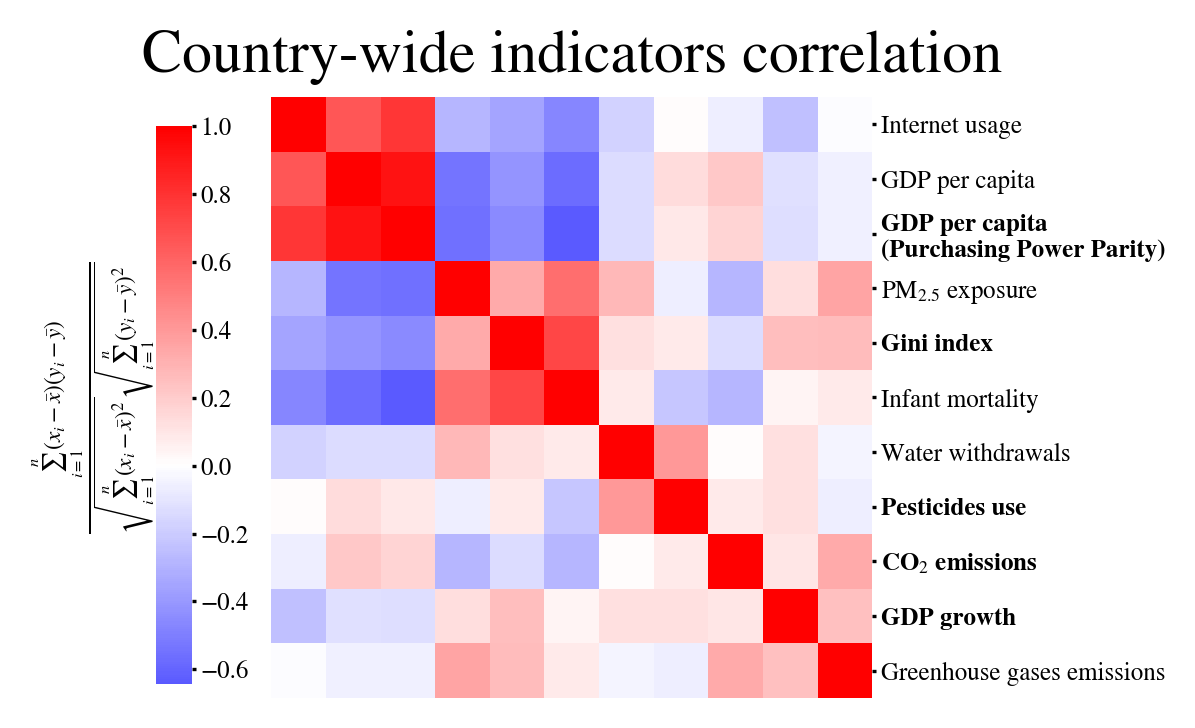

In [58]:
corr_matrix = macro_ind_df.corr()
corr_matrix.columns = corr_matrix.columns.droplevel(0)
corr_matrix.index = corr_matrix.index.droplevel(0)

clm = sns.clustermap(corr_matrix, cmap="bwr", center=0, cbar_pos=(0.05, 0.56, 0.02, 0.31), method="ward", figsize=(6,6))
clm.ax_row_dendrogram.set_visible(False)
clm.ax_col_dendrogram.set_visible(False)
clm.tick_params(size=1, pad=1, labelsize=6)
#clm.ax_heatmap.set_yticklabels(clm.ax_heatmap.get_ymajorticklabels(), fontsize=10)
#clm.ax_cbar.set_yticklabels(clm.ax_cbar.get_ymajorticklabels(), fontsize=10)

#clm.ax_heatmap.set_title("Correlations between macro indicators", fontsize=20);
clm.ax_heatmap.set_xticks([])
clm.ax_heatmap.set_xlabel("")
clm.ax_heatmap.set_ylabel("")

clm.ax_cbar.text(x=-3.5, y=0.2, s=r"$\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}$",fontsize=8, rotation=90, va="center")

macro_indicators = ["GDP growth", "Gini index", "GDP per capita (Purchasing Power Parity)", "Pesticides use", "CO2 emissions per capita"]
corr_labels = {
                    "GDP per capita (Purchasing Power Parity)" : "GDP per capita\n(Purchasing Power Parity)",
                    "CO2 emissions per capita" : r"CO${}_2$ emissions",
                    "PM25 exposure" : r"PM${}_{2.5}$ exposure"
                }

ticklabels_old = [t.get_text() for t in clm.ax_heatmap.get_yticklabels()]
ticklabels_new = [corr_labels.get(t.get_text(), t.get_text()) for t in clm.ax_heatmap.get_yticklabels()]
clm.ax_heatmap.set_yticklabels(ticklabels_new)

for i,tick_label in enumerate(clm.ax_heatmap.get_yticklabels()):
    if ticklabels_old[i] in macro_indicators:
        tick_label.set_fontweight("black")

clm.ax_heatmap.set_title("Country-wide indicators correlation");
        
clm.savefig("../PaperFigures/country-wide_correlation.pdf", format="pdf")